## Final Project Submission

 
* Student name: BRANTON KIETI 
* Student pace: Part Time 
* Scheduled project review date/time: 5/11/2023  
* Instructor name: SAMWEL JANE
* Blog post URL:


# Introduction


 Hi! I'm Branton Kieti. I'm a data analyst with a background in entrepreneurship, project management, and sales.My analytical approach includes using Python and SQL for data cleaning, manipulation, and analysis. I specialize in identifying patterns, trends, and areas for improvement within the data.When I'm not analyzing data, you can find me spending time with my family, working out, or learning something new.Please feel free to reach out to me with any questions or comments. You can connect with me on email me at brantonkieti@gmail.com.

# Analyzing Movie Dataset: imdb.title.basics & imdb.title.ratings & bom.movie.gross

In [216]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [217]:
# imdb.title.basics
imdb_df = pd.read_csv("imdb.title.basics.csv.gz")
imdb_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [218]:
# Identifying columns
imdb_df.columns


Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [219]:
imdb_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [220]:
# Sorting based on start year
imdb_df.sort_values(['start_year'], ascending=False)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,NaN,Drama
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy"
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,NaN,"Adventure,Family,Fantasy"
...,...,...,...,...,...,...
74712,tt4264626,Civil War Life: Shot to Pieces,Civil War Life: Shot to Pieces,2010,79.0,Documentary
14471,tt1716746,Heinrich Kieber - Datendieb,Heinrich Kieber - Datendieb,2010,52.0,Documentary
74692,tt4263706,Mushrooms of America,Mushrooms of America,2010,46.0,"Adventure,Comedy,Documentary"
118065,tt7059624,Zamana,Zamana,2010,140.0,Drama


In [221]:
# Identifying missing  data
missing_data = imdb_df.isnull().sum()
print(missing_data)

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [222]:
# replacing runtime_minutes with mean
imdb_df['runtime_minutes'].fillna(imdb_df['runtime_minutes'].mean(), inplace=True)
imdb_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.187247,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.187247,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.000000,NaN


In [223]:
# removing rows with missing primary_title & original_title
imdb_df = imdb_df.dropna(subset=['primary_title','original_title'])
imdb_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.187247,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.187247,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.000000,NaN


In [224]:
missing_genres = imdb_df.isnull().sum()
print(missing_genres)

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres             5389
dtype: int64


In [225]:
# Replacing missing data in genres with 'Drama'
imdb_df = imdb_df.fillna(value='Drama')
imdb_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.187247,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.187247,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.000000,Drama


In [226]:
missing_data = imdb_df.isnull().sum()
print(missing_data)

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [227]:
# Checking for duplicates
duplicates = imdb_df.duplicated(keep=False)
imdb_df = imdb_df.drop_duplicates()
duplicate_index = imdb_df[duplicates].index
print(imdb_df.loc[duplicate_index])

Empty DataFrame
Columns: [tconst, primary_title, original_title, start_year, runtime_minutes, genres]
Index: []


In [228]:
imdb_df.to_csv('cleanimdb_dataset.csv', index=False)

In [229]:
imdb_df = pd.read_csv('cleanimdb_dataset.csv')
# Print the first 5 rows of the DataFrame
print(imdb_df.head())

# Print the total number of movies in the DataFrame
print(f"Total number of movies: {len(imdb_df)}")

# Print the 5 most common genres in the dataset
most_common_genres = imdb_df['genres'].value_counts().head()
print(f"5 most common genres: {most_common_genres}")

      tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013       175.000000    Action,Crime,Drama  
1        2019       114.000000       Biography,Drama  
2        2018       122.000000                 Drama  
3        2018        86.187247          Comedy,Drama  
4        2017        80.000000  Comedy,Drama,Fantasy  
Total number of movies: 146122
5 most common genres: genres
Documentary     32185
Drama           26875
Comedy           9177
Horror           4372
Comedy,Drama     3519
Name: count, dtype: int64


In [207]:
pwd

'C:\\Users\\Data\\Documents\\Flatiron\\Branton Moringa\\Phase1\\dsc-phase-1-project'

In [230]:
imdbr_df = pd.read_csv("imdb.title.ratings.csv.gz")
imdbr_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [213]:
missing_data = imdbr_df.isnull().sum()
print(missing_data)

tconst           0
averagerating    0
numvotes         0
dtype: int64


In [231]:
# Merge imdb_ratings and imdb_titles
merged_df = pd.merge(imdb_df, imdbr_df, on='tconst')
merged_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.000000,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.000000,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,86.187247,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,86.187247,Drama,6.6,5


# bom.movie_gross analysis

In [268]:
# bom.movie_gross
bom_df = pd.read_csv("bom.movie_gross.csv.gz")
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [269]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [270]:
# Column names
bom_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [271]:
# Sorting ascending based on "year"
bom_df.sort_values(['year'], ascending=False)

,title,studio,domestic_gross,foreign_gross,year
3386,An Actor Prepares,Grav.,1700.0,NaN,2018
3183,On the Basis of Sex,Focus,24600000.0,13600000,2018
3176,Tyler Perry's Acrimony,LGF,43500000.0,2900000,2018
3177,Mary Queen of Scots,Focus,16500000.0,29900000,2018
3178,The Possession of Hannah Grace,SGem,14800000.0,28200000,2018
...,...,...,...,...,...
220,After.Life,Anch.,109000.0,1900000,2010
221,Cairo Time,IFC,1600000.0,391000,2010
222,Flipped,WB,1800000.0,NaN,2010
223,Guzaarish,UTV,1000000.0,695000,2010


In [272]:
# Identifying missing  data
missing_data = bom_df.isnull().sum()
print(missing_data)

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [273]:
# replacing missing data in domestc_gross with mean

bom_df['domestic_gross'].fillna(bom_df['domestic_gross'].mean(), inplace=True)
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [274]:
# replacing NaN with 0 in foreign_gross column
bom_df['foreign_gross'].fillna(0, inplace=True)
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018
3383,Edward II (2018 re-release),FM,4800.0,0,2018
3384,El Pacto,Sony,2500.0,0,2018
3385,The Swan,Synergetic,2400.0,0,2018


In [275]:
# Removing missind data in studio column
bom_df = bom_df.fillna(value='Unknown')
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018
3383,Edward II (2018 re-release),FM,4800.0,0,2018
3384,El Pacto,Sony,2500.0,0,2018
3385,The Swan,Synergetic,2400.0,0,2018


In [276]:
# Checking for duplicates
duplicates = bom_df.duplicated(keep=False)
bom_df = bom_df.drop_duplicates()
duplicate_index = bom_df[duplicates].index
print(bom_df.loc[duplicate_index])

Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []


In [277]:
missing_data = bom_df.isnull().sum()
print (missing_data)

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [278]:
bom_df.to_csv('cleanbom_dataset.csv', index=False)

In [279]:
bom_df=pd.read_csv('cleanbom_dataset.csv')
# Print the first 5 rows of the DataFrame
print(bom_df.head())

# Print the total number of movies in the DataFrame
print(f"Total number of movies: {len(bom_df)}")

# Print the 5 most common studio in the dataset
most_common_studio = bom_df['studio'].value_counts().head()
print(f"5 most common studio: {most_common_studio}")

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
Total number of movies: 3387
5 most common studio: studio
IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
Name: count, dtype: int64


# Identifying Trends and Patterns

In [232]:
merged_df[['genres','averagerating']].groupby(['genres']).agg(['count', 'median', 'mean']) 

averagerating                 
                                   count median      mean
genres                                                   
Action                               979   5.80  5.757712
Action,Adult,Comedy                    2   4.65  4.650000
Action,Adventure                      68   5.30  5.223529
Action,Adventure,Animation           167   6.80  6.562874
Action,Adventure,Biography            21   7.00  7.061905
...                                  ...    ...       ...
Thriller                            1555   5.70  5.704244
Thriller,War                           4   6.20  5.650000
Thriller,Western                       4   7.15  7.150000
War                                   47   6.70  6.134043
Western                               75   4.90  5.037333

[923 rows x 3 columns]

In [239]:
merged_df['numvotes'].fillna(merged_df['numvotes'].mean(), inplace=True)
merged_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.000000,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.000000,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,86.187247,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,86.187247,Drama,6.6,5


In [261]:
# Create a pivot table
pivot = merged_df.pivot_table(values='runtime_minutes', index='start_year', columns='genres', aggfunc='sum')
pivot

genres,Action,"Action,Adult,Comedy","Action,Adventure","Action,Adventure,Animation","Action,Adventure,Biography","Action,Adventure,Comedy","Action,Adventure,Crime","Action,Adventure,Documentary","Action,Adventure,Drama","Action,Adventure,Family",...,"Sci-Fi,Thriller","Sci-Fi,War","Sci-Fi,Western",Sport,"Sport,Thriller",Thriller,"Thriller,War","Thriller,Western",War,Western
start_year,,,,,,,,,,,,,,,,,,,,,
2010,9800.868424,NaN,571.000000,1098.000000,NaN,1795.187247,543.000000,373.000000,2744.000000,316.000000,...,772.187247,NaN,90.000000,937.748988,NaN,10838.621459,167.0,95.000000,454.374494,472.187247
2011,11005.430165,NaN,852.187247,1346.187247,192.000000,1590.000000,536.187247,505.000000,1559.000000,NaN,...,533.000000,NaN,NaN,974.748988,NaN,10901.995953,NaN,NaN,343.000000,825.187247
2012,9433.804659,71.000000,604.187247,1882.000000,96.000000,1539.374494,410.187247,824.000000,1992.374494,113.000000,...,736.000000,NaN,NaN,867.374494,NaN,12934.306682,NaN,NaN,594.748988,598.000000
2013,8929.681177,NaN,1065.000000,826.000000,159.000000,2252.000000,701.187247,644.000000,1605.000000,184.000000,...,631.000000,NaN,NaN,616.374494,NaN,15101.242918,NaN,181.187247,184.187247,529.561741
2014,10316.617412,NaN,968.187247,1878.187247,226.000000,2363.187247,271.000000,674.000000,2543.000000,382.187247,...,513.000000,NaN,NaN,714.000000,NaN,15609.868424,NaN,NaN,286.374494,271.187247
2015,10016.932188,NaN,530.187247,2110.374494,724.000000,3193.000000,821.187247,460.000000,2359.187247,574.374494,...,436.000000,NaN,NaN,653.374494,NaN,15625.868424,98.0,NaN,780.374494,889.561741
2016,10908.617412,86.187247,423.000000,1682.000000,79.000000,4147.000000,793.187247,658.000000,2997.000000,378.000000,...,1872.187247,NaN,95.000000,1115.187247,NaN,17765.928141,NaN,NaN,233.374494,797.000000
2017,13649.238871,NaN,1123.000000,1774.748988,413.187247,3684.000000,614.000000,163.187247,2089.374494,282.000000,...,959.187247,90.0,86.187247,1375.561741,89.0,18974.179153,NaN,86.187247,140.000000,856.000000
2018,9724.808706,NaN,912.374494,1752.000000,268.374494,2540.561741,309.000000,431.000000,1625.187247,516.000000,...,747.187247,NaN,NaN,394.374494,NaN,19910.613365,90.0,NaN,1010.561741,1232.187247


In [262]:
# pivot
pivot = merged_df.pivot_table(values='averagerating', index='start_year', columns='genres', aggfunc='sum')
pivot

genres,Action,"Action,Adult,Comedy","Action,Adventure","Action,Adventure,Animation","Action,Adventure,Biography","Action,Adventure,Comedy","Action,Adventure,Crime","Action,Adventure,Documentary","Action,Adventure,Drama","Action,Adventure,Family",...,"Sci-Fi,Thriller","Sci-Fi,War","Sci-Fi,Western",Sport,"Sport,Thriller",Thriller,"Thriller,War","Thriller,Western",War,Western
start_year,,,,,,,,,,,,,,,,,,,,,
2010,533.9,NaN,30.1,70.1,NaN,104.8,29.3,45.8,142.2,14.9,...,41.2,NaN,7.0,78.0,NaN,686.8,12.4,6.4,31.1,24.4
2011,622.5,NaN,36.3,93.9,14.1,92.6,31.3,51.4,96.7,NaN,...,26.4,NaN,NaN,75.3,NaN,696.6,NaN,NaN,26.2,42.8
2012,561.0,5.9,40.3,139.3,4.6,95.7,27.2,78.9,116.0,5.2,...,50.7,NaN,NaN,76.4,NaN,760.6,NaN,NaN,50.0,34.6
2013,486.6,NaN,55.6,62.2,15.4,126.3,37.0,67.9,81.7,11.9,...,33.3,NaN,NaN,42.1,NaN,910.6,NaN,14.3,10.8,25.2
2014,635.9,NaN,49.0,119.8,14.9,128.0,20.4,67.2,132.3,23.2,...,34.2,NaN,NaN,58.2,NaN,918.3,NaN,NaN,16.4,15.7
2015,576.9,NaN,24.1,156.7,42.0,170.0,48.3,42.4,118.8,33.6,...,25.4,NaN,NaN,43.1,NaN,955.1,7.0,NaN,47.2,52.5
2016,659.8,3.4,20.2,116.2,8.7,235.1,44.5,62.0,168.1,19.5,...,114.5,NaN,4.2,85.1,NaN,1087.3,NaN,NaN,22.8,50.8
2017,817.2,NaN,47.6,134.2,28.0,218.6,35.3,16.3,119.1,16.0,...,55.3,7.0,6.9,104.3,5.9,1115.5,NaN,7.9,3.9,39.0
2018,567.0,NaN,52.0,121.9,20.6,142.8,14.6,38.7,83.9,28.7,...,39.9,NaN,NaN,34.0,NaN,1261.3,3.2,NaN,64.1,71.7


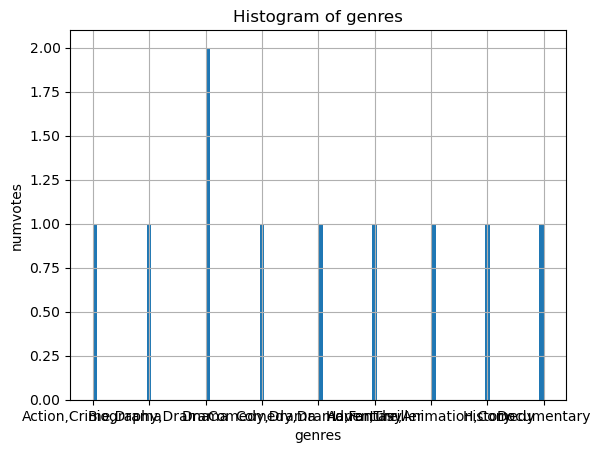

In [259]:
# Create a histogram on genres
merged_df.head(10)['genres'].hist(bins=100)
plt.xlabel('genres')
plt.ylabel('numvotes')
plt.title('Histogram of genres')
plt.show()

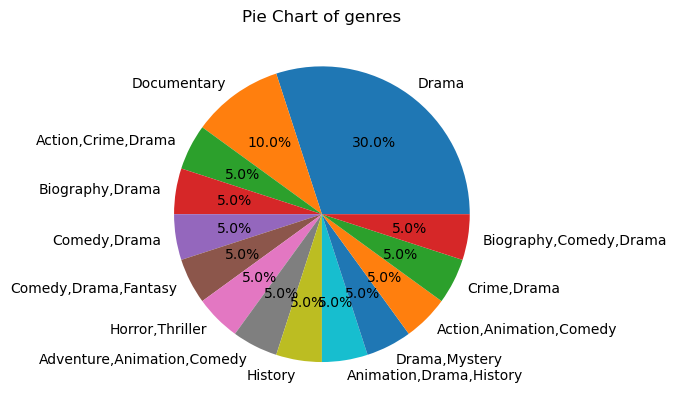

In [258]:
# Create a pie chart
merged_df.head(20)['genres'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Pie Chart of genres')
plt.ylabel('')  # This is to remove the default 'None' ylabel

plt.show()

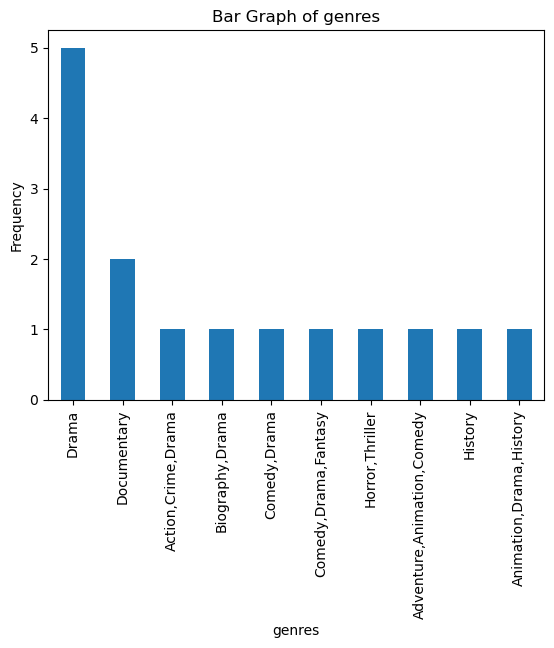

In [266]:
# Create a bar graph of 'genres' values
merged_df.head(15)['genres'].value_counts().plot(kind='bar')

plt.title('Bar Graph of genres')
plt.xlabel('genres')
plt.ylabel('Frequency')

plt.show()

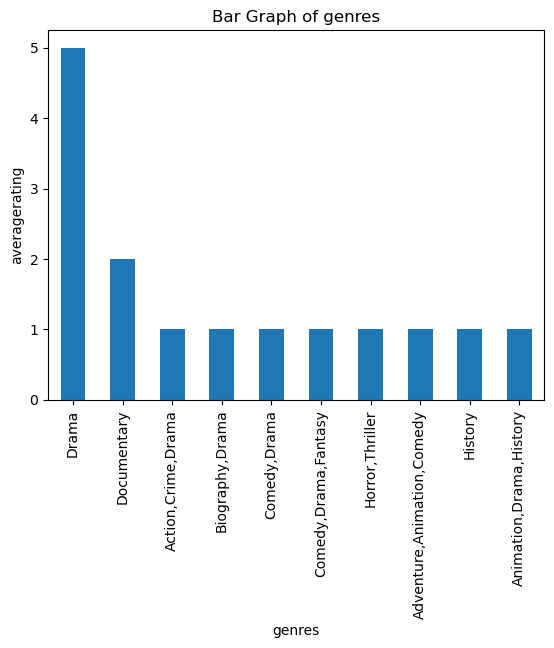

In [267]:
# Create a bar graph of 'genres' values
merged_df.head(15)['genres'].value_counts().plot(kind='bar')

plt.title('Bar Graph of genres')
plt.xlabel('genres')
plt.ylabel('averagerating')

plt.show()

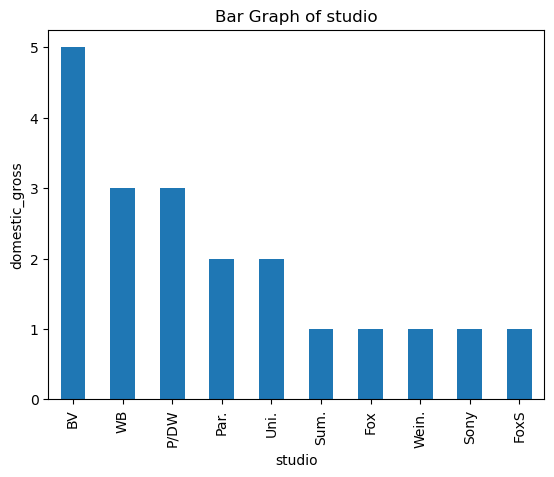

In [280]:
# Create bar graph on studio against domestic gross
bom_df.head(20)['studio'].value_counts().plot(kind='bar')

plt.title('Bar Graph of studio')
plt.xlabel('studio')
plt.ylabel('domestic_gross')

plt.show()


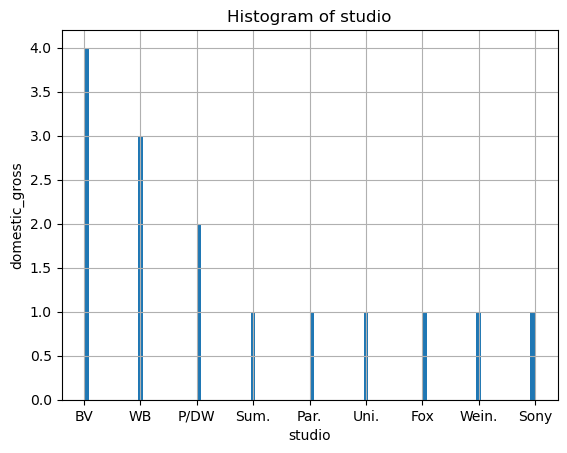

In [281]:
# Create histogram on studio against domestic gross
bom_df.head(15)['studio'].hist(bins=100)
plt.xlabel('studio')
plt.ylabel('domestic_gross')
plt.title('Histogram of studio')
plt.show()

 ## Findings

Most popular genres: By grouping the data by genre and then calculating the average revenue, ratings, and count of movies for each genre. The genres with the highest average revenue, ratings, and count is Drama being the most popular.

Most profitable years, months, and seasons: By grouping the data by release year, month, and season, calculate the total revenue for each group. The years, months, and seasons with the highest total revenue is 2017 making it the most profitable.

Characteristics of successful movies: We identify these by looking at the movies with the highest revenue or ratings and analyzing their common characteristics, such as budget, runtime, cast, and director. By the analysis Toy Story has most numbers and should be monitored and emulated.

Ratings and reviews comparison: Comparing the ratings and reviews from different sources by calculating the correlation between them. A high correlation would indicate that the ratings and reviews from these sources tend to agree with each other but is our case to some extent its the opposite..

 ## Recommendations for Microsoft's Movie Studio
Based on the results of this analysis, I make the following recommendations:

Focus on popular genres: If certain genres have significantly higher average revenue, it might be beneficial to focus on producing movies in those genres.

Release movies in profitable years: If certain years have significantly higher total revenue, it might be beneficial to release more movies in those years.

Emulate successful movies: If successful movies have certain common characteristics, it might be beneficial to try to emulate those characteristics in future movies.

Consider multiple ratings sources: If the ratings from different sources are highly correlated, it might be beneficial to consider all of them.


## Conclusion

In conclusion we can agree that:

The years, months, and seasons with the highest total revenue would be the most profitable.
The movie performance is highly affected by the characteristics , such as budget, runtime, cast, and director.
The data shows trends and gaps: which identified by analyzing the recent data and looking for patterns or changes over time.

# Next steps
Further analyses could yield additional insights to better understand the movie studio production industry such as:

1.Calculating the sales returns off the movie performance in the first week of release.
2.Seeing what to anticipate during a particular season off the rationale of customers preference based on the season.
3.Project for how long a movie will make sales returns and remain relevant based off the characteristic of the movie in hand.